In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import comparing as comp
import combining as comb
import plots
import numpy as np

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

In [4]:
measures = [sim.pearson_correlation, sim.mutual_information, comp.invert(sim.transfer_entropy), comp.invert(sim.manhattan_distance)]

In [5]:
measure_labels = ["Pearson's Correlation", "Mutual Information", "Transfer Entropy", "Manhattan Distance"]

<h2>Show areas of no dependencies in both similarity measures</h2>
Often the focus of the maps lies on the areas where we have dependencies. Maybe it would also be interesting to analyze areas where we have no dependencies.

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:402: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[i][j])


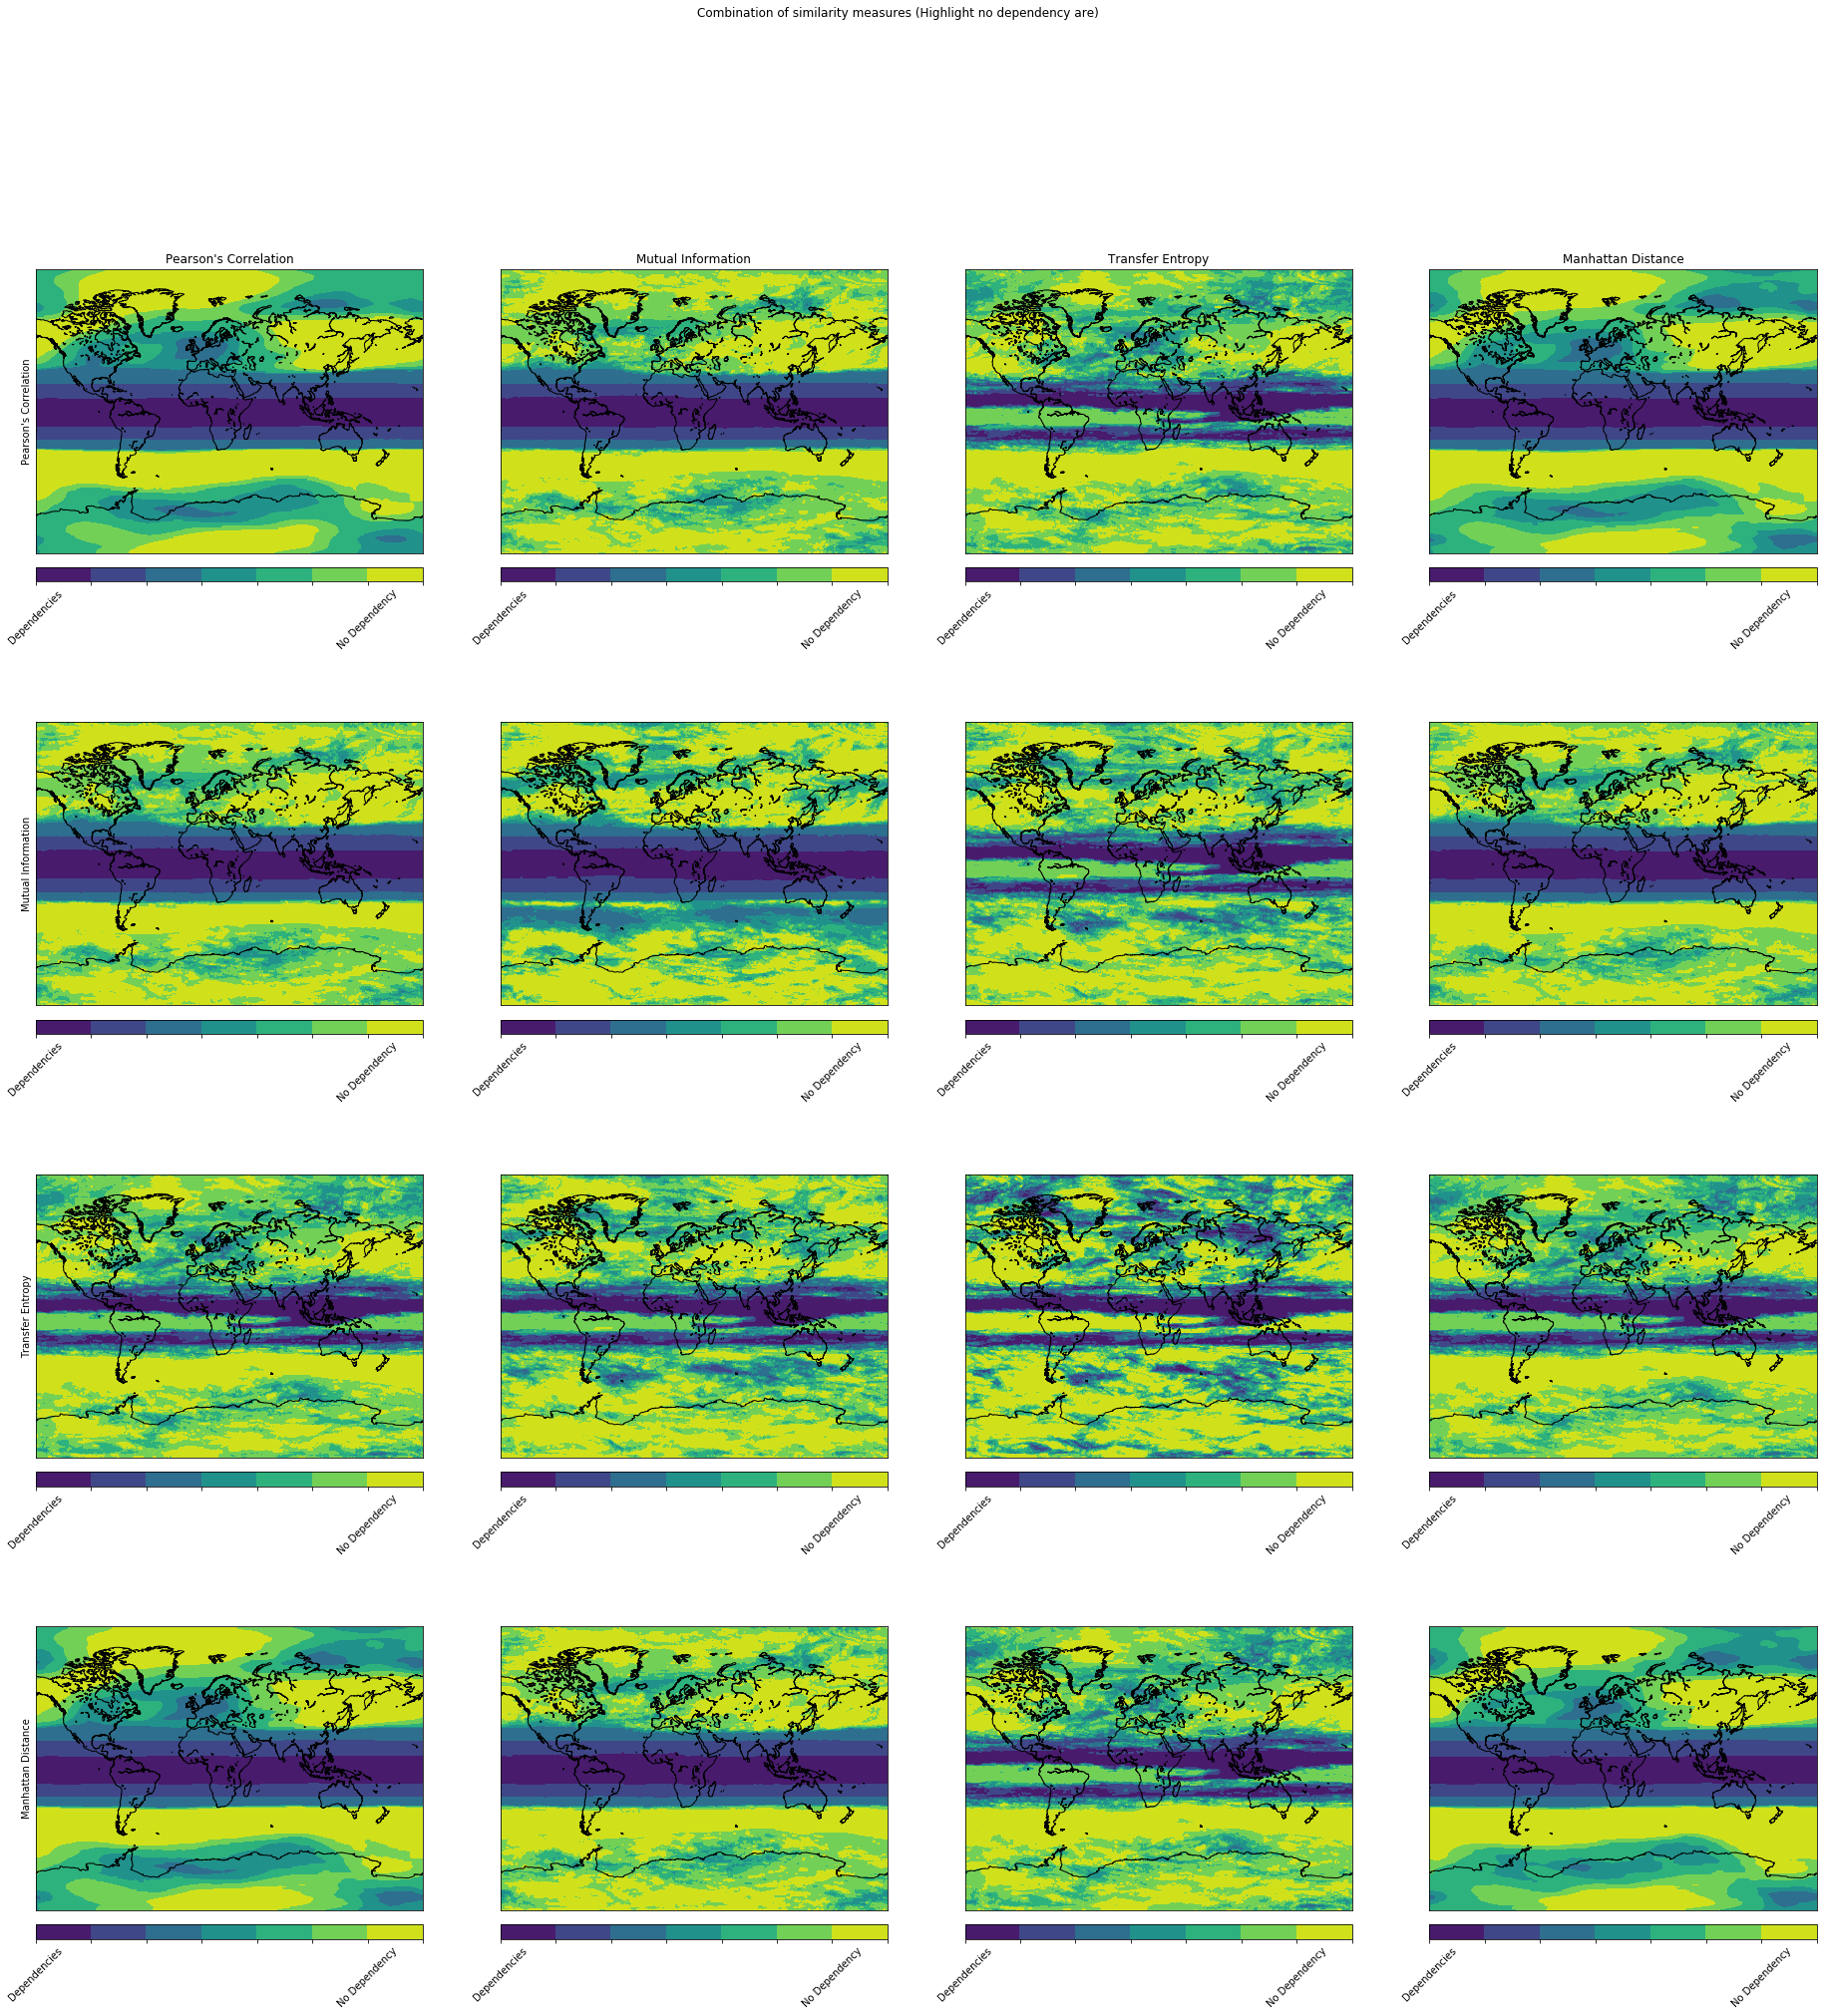

In [6]:
plots.plot_no_dependencies_areas(u_l30, qbo_equator, measures, measure_labels)

In [8]:
measures = [sim.pearson_correlation, sim.mutual_information, comp.invert(sim.manhattan_distance)]

In [9]:
measure_labels = ["Pearson's Correlation", "Mutual Information", "Manhattan Distance"]

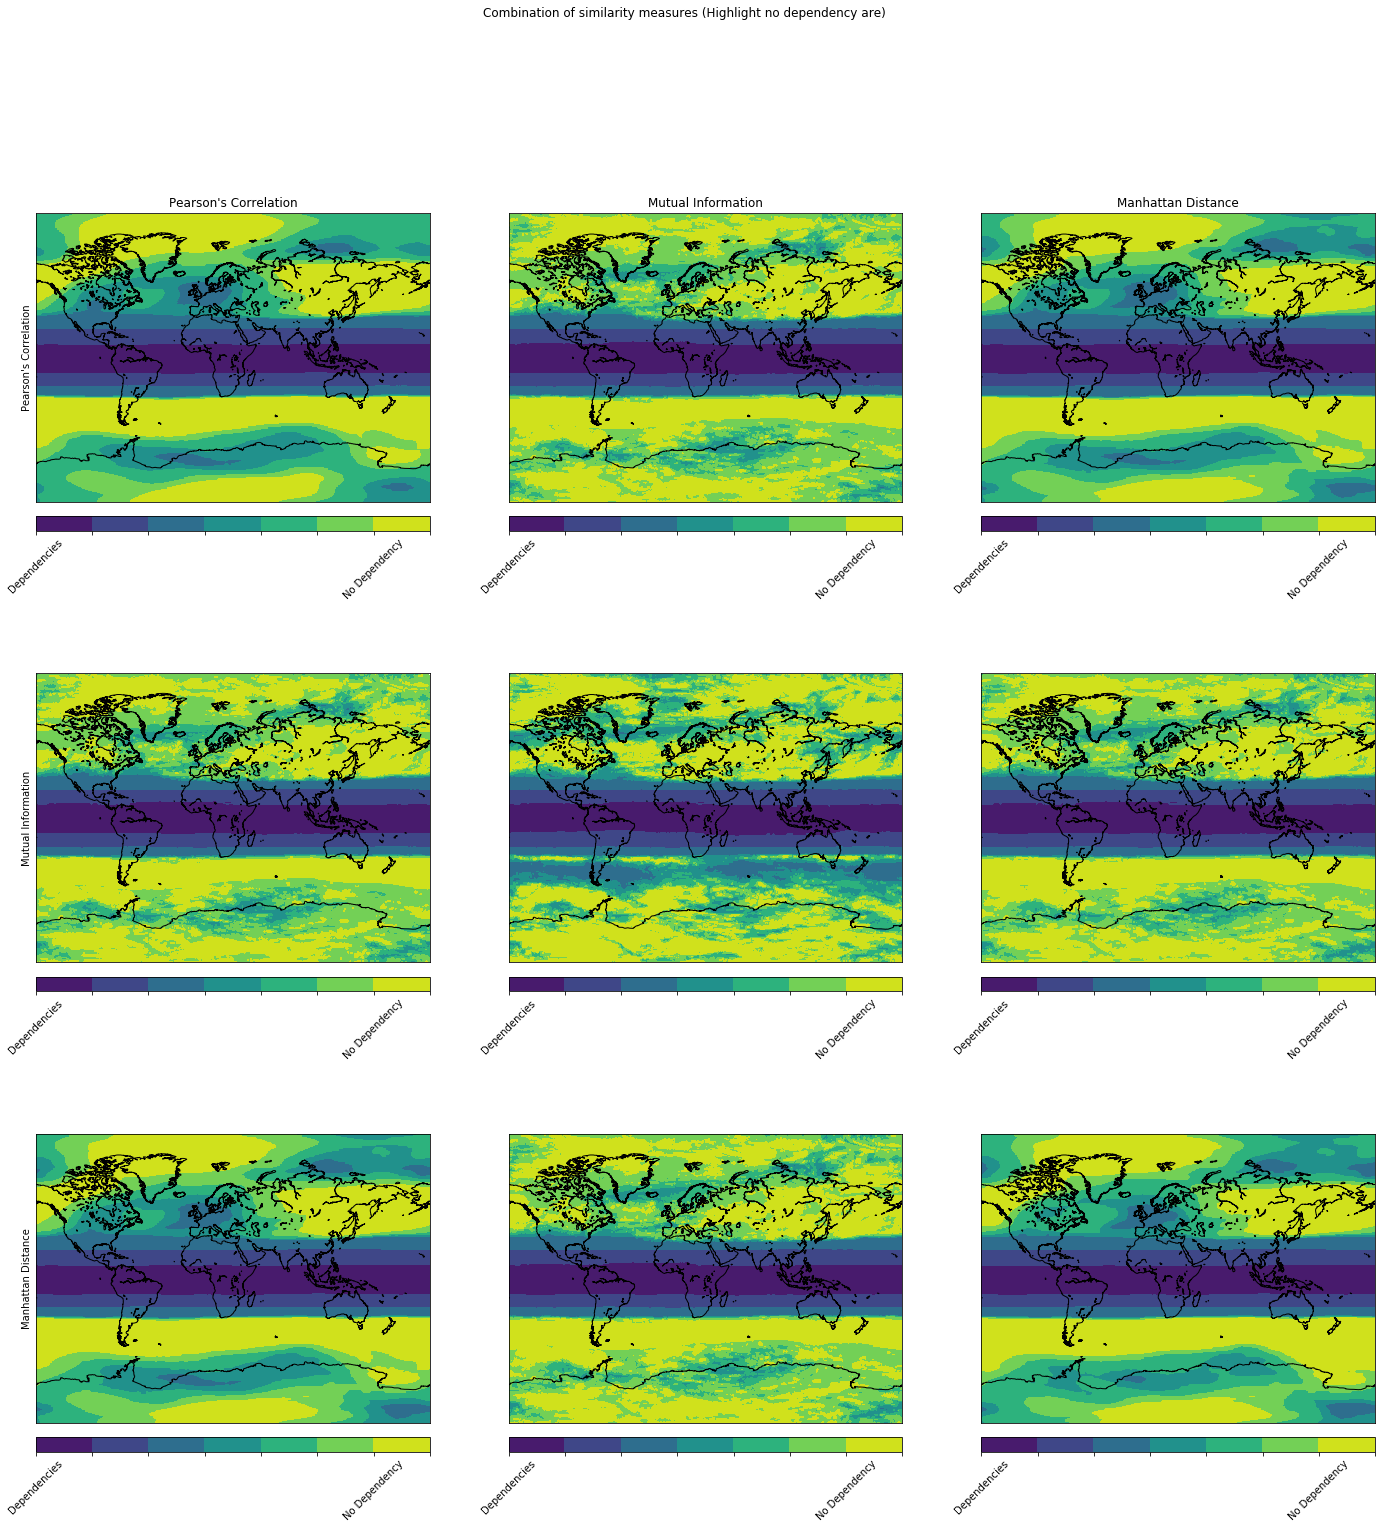

In [12]:
plots.plot_no_dependencies_areas(u_l30, qbo_equator, measures, measure_labels)